# 1) Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# 2) Importing dataset

In [2]:
df=pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

In [5]:
df.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.289885,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.328178,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df.Date[:10]

0    3/09/2016
1    3/12/2016
2    4/02/2016
3    4/02/2016
4    4/03/2017
5    4/03/2017
6    4/06/2016
7    6/08/2016
8    6/08/2016
9    6/08/2016
Name: Date, dtype: object

In [9]:
df=pd.read_csv('Melbourne_housing_FULL.csv',parse_dates=['Date'])

In [10]:
df.Date[:10]

0   2016-03-09
1   2016-03-12
2   2016-04-02
3   2016-04-02
4   2017-04-03
5   2017-04-03
6   2016-04-06
7   2016-06-08
8   2016-06-08
9   2016-06-08
Name: Date, dtype: datetime64[ns]

In [11]:
df['Date']=df.Date.dt.year

In [12]:
df['Date']

0        2016
1        2016
2        2016
3        2016
4        2017
         ... 
34852    2018
34853    2018
34854    2018
34855    2018
34856    2018
Name: Date, Length: 34857, dtype: int64

# 3) Remove Variables

In [13]:
del df['Address']
del df['Method']
del df['SellerG']
del df['Postcode']
del df['Lattitude']
del df['Longtitude']
del df['Propertycount']

# 4) Remove missing Values

In [14]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Date                0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
CouncilArea         3
Regionname          3
dtype: int64

In [15]:
df_heat=df.corr()

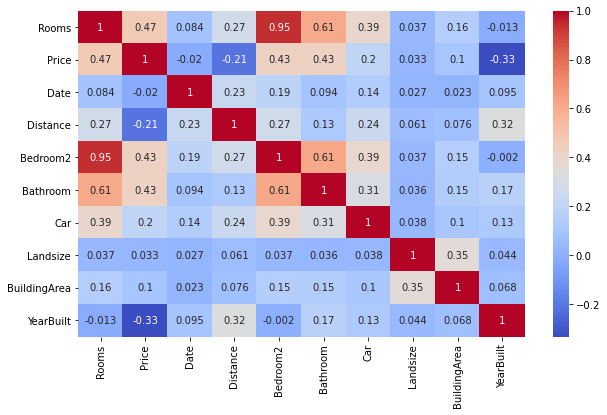

In [16]:
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df_heat,annot=True,cmap='coolwarm');

In [17]:
df.corrwith(df['Price'])

Rooms           0.465238
Price           1.000000
Date           -0.020268
Distance       -0.211384
Bedroom2        0.430275
Bathroom        0.429878
Car             0.201803
Landsize        0.032748
BuildingArea    0.100754
YearBuilt      -0.333306
dtype: float64

In [18]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Date                0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
CouncilArea         3
Regionname          3
dtype: int64

In [19]:
df.shape

(34857, 14)

In [20]:
pd.DataFrame({'num_of_missing_rows':df.isna().sum(),'corr_with_Price':df.corrwith(df["Price"])})

,num_of_missing_rows,corr_with_Price
Bathroom,8226,0.429878
Bedroom2,8217,0.430275
BuildingArea,21115,0.100754
Car,8728,0.201803
CouncilArea,3,NaN
Date,0,-0.020268
Distance,1,-0.211384
Landsize,11810,0.032748
Price,7610,1.000000
Regionname,3,NaN


###  Removing rows for variables with small number of missing values(Distance)
###  Avoid filling values for variables with high correlation with price(Bedroom2 and Bathroom)


In [21]:
df.dropna(axis=0,how='any',thresh=None,subset=['Distance','Bedroom2','Bathroom','Price'],inplace=True)

In [22]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car               377
Landsize         2827
BuildingArea    10144
YearBuilt        8717
CouncilArea         0
Regionname          0
dtype: int64

# Filling missing values with mean/median whose correlation with price is less

In [23]:

df['Car'].fillna(df['Car'].median(),inplace=True)
df['Landsize'].fillna(df['Landsize'].median(),inplace=True)
df['YearBuilt'].fillna(df['YearBuilt'].median(),inplace=True)  
df['BuildingArea'].fillna(df['BuildingArea'].median(),inplace=True)

In [24]:
df.isna().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Date            0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64

### converting categorical values to numeric

In [25]:
print(df['Type'].unique())
print(df['Type'].nunique())

['h' 'u' 't']
3


In [26]:
df['Type'].value_counts()

h    15728
u     3493
t     1579
Name: Type, dtype: int64

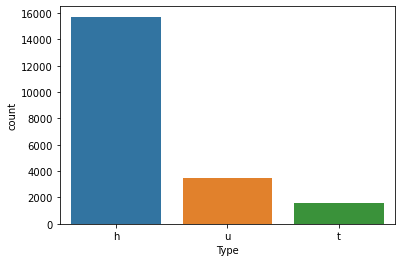

In [27]:
sns.countplot(x='Type',data=df);

In [28]:
#h- house,cottage,villa, semi,terrace
#u- unit, duplex
#t- townhouse
df['Type']=df['Type'].map({'h':0,'u':1,'t':2})

In [29]:
df['Type'].unique()

array([0, 1, 2], dtype=int64)

In [30]:
#similarly for Council Area
print(df['CouncilArea'].unique())
print(df['CouncilArea'].nunique())

['Yarra City Council' 'Moonee Valley City Council'
 'Port Phillip City Council' 'Darebin City Council'
 'Hobsons Bay City Council' 'Stonnington City Council'
 'Boroondara City Council' 'Monash City Council' 'Glen Eira City Council'
 'Whitehorse City Council' 'Maribyrnong City Council'
 'Bayside City Council' 'Moreland City Council' 'Manningham City Council'
 'Melbourne City Council' 'Banyule City Council' 'Brimbank City Council'
 'Kingston City Council' 'Hume City Council' 'Knox City Council'
 'Maroondah City Council' 'Casey City Council' 'Melton City Council'
 'Greater Dandenong City Council' 'Nillumbik Shire Council'
 'Whittlesea City Council' 'Frankston City Council'
 'Macedon Ranges Shire Council' 'Yarra Ranges Shire Council'
 'Wyndham City Council' 'Cardinia Shire Council' 'Moorabool Shire Council'
 'Mitchell Shire Council']
33


In [31]:
df['CouncilArea'].value_counts()

Boroondara City Council           1889
Darebin City Council              1766
Moreland City Council             1338
Moonee Valley City Council        1228
Glen Eira City Council            1198
Banyule City Council              1101
Melbourne City Council            1086
Brimbank City Council             1073
Maribyrnong City Council           986
Bayside City Council               968
Hume City Council                  853
Monash City Council                751
Port Phillip City Council          716
Yarra City Council                 697
Stonnington City Council           659
Hobsons Bay City Council           631
Manningham City Council            622
Whittlesea City Council            584
Kingston City Council              522
Wyndham City Council               399
Whitehorse City Council            353
Maroondah City Council             284
Knox City Council                  237
Melton City Council                199
Frankston City Council             192
Greater Dandenong City Co

In [32]:
df['CouncilArea']=df['CouncilArea'].map({'Yarra City Council':0,
                                         'Moonee Valley City Council':1,
                                         'Port Phillip City Council':2,
                                         'Darebin City Council':3,
                                         'Hobsons Bay City Council':4, 
                                         'Stonnington City Council':5,
                                         'Boroondara City Council':6,
                                         'Monash City Council':7,
                                         'Glen Eira City Council':8, 
                                         'Whitehorse City Council':9,
                                         'Maribyrnong City Council':10,
                                         'Bayside City Council':11,
                                         'Moreland City Council':12,
                                         'Manningham City Council':13,
                                         'Melbourne City Council':14,
                                         'Banyule City Council':15,
                                         'Brimbank City Council':16,
                                         'Kingston City Council':17,
                                         'Hume City Council':18,
                                         'Knox City Council':19,
                                         'Maroondah City Council':20,
                                         'Casey City Council':21,
                                         'Melton City Council':22,
                                         'Greater Dandenong City Council':23,
                                         'Nillumbik Shire Council':24,
                                         'Cardinia Shire Council':25,
                                         'Whittlesea City Council':26,
                                         'Frankston City Council':27,
                                         'Macedon Ranges Shire Council':28,
                                         'Yarra Ranges Shire Council':29,
                                         'Wyndham City Council':30,
                                         'Moorabool Shire Council':31,
                                         'Mitchell Shire Council':32})

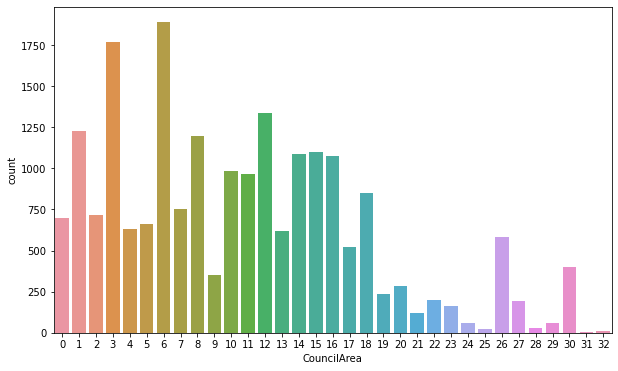

In [33]:
fig,ax=plt.subplots(figsize=(10,6))

sns.countplot(x='CouncilArea',data=df);

In [34]:
df['CouncilArea'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 25, 31, 32],
      dtype=int64)

In [35]:
#similarly for Regionname
print(df['Regionname'].unique())
print(df['Regionname'].nunique())

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']
8


In [36]:
df['Regionname'].value_counts()

Southern Metropolitan         6319
Northern Metropolitan         5949
Western Metropolitan          4599
Eastern Metropolitan          2543
South-Eastern Metropolitan    1023
Eastern Victoria               140
Northern Victoria              140
Western Victoria                87
Name: Regionname, dtype: int64

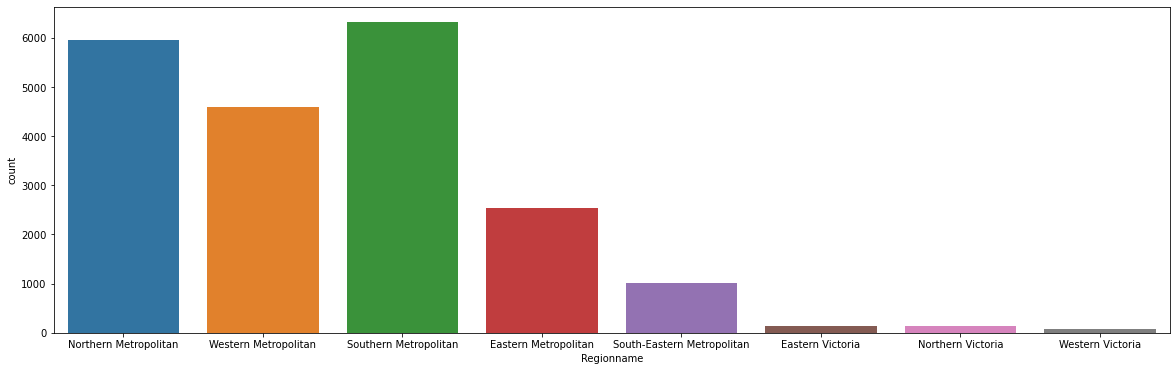

In [37]:
fig,ax=plt.subplots(figsize=(20,6))

sns.countplot(x='Regionname',data=df);

In [38]:
df['Regionname']=df['Regionname'].map({'Northern Metropolitan':0,
                                       'Western Metropolitan':1,
                                       'Southern Metropolitan':2,
                                       'Eastern Metropolitan':3,
                                       'South-Eastern Metropolitan':4,
                                       'Northern Victoria':5,
                                       'Eastern Victoria':6,
                                       'Western Victoria':7})

In [39]:
print(df['Regionname'].unique())
print(df['Regionname'].nunique())

[0 1 2 3 4 6 5 7]
8


In [40]:
print(df['Suburb'].unique())
print(len(df['Suburb'].unique()))
dic={}
j=0
for i in df['Suburb'].unique():
    dic[str(i)]=j
    j+=1

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Northcote'

In [41]:
dic

{'Abbotsford': 0,
 'Airport West': 1,
 'Albert Park': 2,
 'Alphington': 3,
 'Altona': 4,
 'Altona North': 5,
 'Armadale': 6,
 'Ascot Vale': 7,
 'Ashburton': 8,
 'Ashwood': 9,
 'Avondale Heights': 10,
 'Balaclava': 11,
 'Balwyn': 12,
 'Balwyn North': 13,
 'Bentleigh': 14,
 'Bentleigh East': 15,
 'Box Hill': 16,
 'Braybrook': 17,
 'Brighton': 18,
 'Brighton East': 19,
 'Brunswick': 20,
 'Brunswick West': 21,
 'Bulleen': 22,
 'Burwood': 23,
 'Camberwell': 24,
 'Canterbury': 25,
 'Carlton North': 26,
 'Carnegie': 27,
 'Caulfield': 28,
 'Caulfield North': 29,
 'Caulfield South': 30,
 'Chadstone': 31,
 'Clifton Hill': 32,
 'Coburg': 33,
 'Coburg North': 34,
 'Collingwood': 35,
 'Doncaster': 36,
 'Eaglemont': 37,
 'Elsternwick': 38,
 'Elwood': 39,
 'Essendon': 40,
 'Essendon North': 41,
 'Fairfield': 42,
 'Fitzroy': 43,
 'Fitzroy North': 44,
 'Flemington': 45,
 'Footscray': 46,
 'Glen Iris': 47,
 'Glenroy': 48,
 'Gowanbrae': 49,
 'Hadfield': 50,
 'Hampton': 51,
 'Hampton East': 52,
 'Hawthorn

In [42]:
df['Suburb']=df['Suburb'].map(dic)

In [43]:
corr=df.corr()
corr.style.background_gradient(cmap='gist_earth_r')

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
Suburb,1.000000,0.178839,-0.163646,-0.249326,0.340302,0.649325,0.186843,0.085540,0.141326,0.032106,0.026834,0.188615,0.597936,0.280586
Rooms,0.178839,1.000000,-0.366545,0.444840,0.175422,0.280091,0.958720,0.607968,0.390277,0.031541,0.102583,-0.001414,0.167501,0.152716
Type,-0.163646,-0.366545,1.000000,-0.257397,-0.147925,-0.180438,-0.357771,-0.070239,-0.193483,-0.026228,-0.035898,0.276686,-0.143791,-0.033210
Price,-0.249326,0.444840,-0.257397,1.000000,0.025371,-0.236455,0.430296,0.429878,0.201382,0.030632,0.074606,-0.259458,-0.282228,0.129839
Date,0.340302,0.175422,-0.147925,0.025371,1.000000,0.274664,0.192551,0.096418,0.145579,0.022141,0.013145,0.082372,0.260990,0.096391
Distance,0.649325,0.280091,-0.180438,-0.236455,0.274664,1.000000,0.282914,0.140767,0.238241,0.048959,0.057446,0.243218,0.660355,0.489308
Bedroom2,0.186843,0.958720,-0.357771,0.430296,0.192551,0.282914,1.000000,0.605309,0.392087,0.031485,0.100433,0.006067,0.172027,0.155424
Bathroom,0.085540,0.607968,-0.070239,0.429878,0.096418,0.140767,0.605309,1.000000,0.301381,0.034720,0.098449,0.138419,0.066118,0.153383
Car,0.141326,0.390277,-0.193483,0.201382,0.145579,0.238241,0.392087,0.301381,1.000000,0.028798,0.065295,0.088148,0.138608,0.107620
Landsize,0.032106,0.031541,-0.026228,0.030632,0.022141,0.048959,0.031485,0.034720,0.028798,1.000000,0.086493,0.009662,0.024667,0.030723


In [44]:
df.corrwith(df['Price'])

Suburb         -0.249326
Rooms           0.444840
Type           -0.257397
Price           1.000000
Date            0.025371
Distance       -0.236455
Bedroom2        0.430296
Bathroom        0.429878
Car             0.201382
Landsize        0.030632
BuildingArea    0.074606
YearBuilt      -0.259458
CouncilArea    -0.282228
Regionname      0.129839
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 1 to 34856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        20800 non-null  int64  
 1   Rooms         20800 non-null  int64  
 2   Type          20800 non-null  int64  
 3   Price         20800 non-null  float64
 4   Date          20800 non-null  int64  
 5   Distance      20800 non-null  float64
 6   Bedroom2      20800 non-null  float64
 7   Bathroom      20800 non-null  float64
 8   Car           20800 non-null  float64
 9   Landsize      20800 non-null  float64
 10  BuildingArea  20800 non-null  float64
 11  YearBuilt     20800 non-null  float64
 12  CouncilArea   20800 non-null  int64  
 13  Regionname    20800 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 3.0 MB


In [46]:
df.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Date            0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64

## Removing Outliers by interpreting scatterplot and boxplots

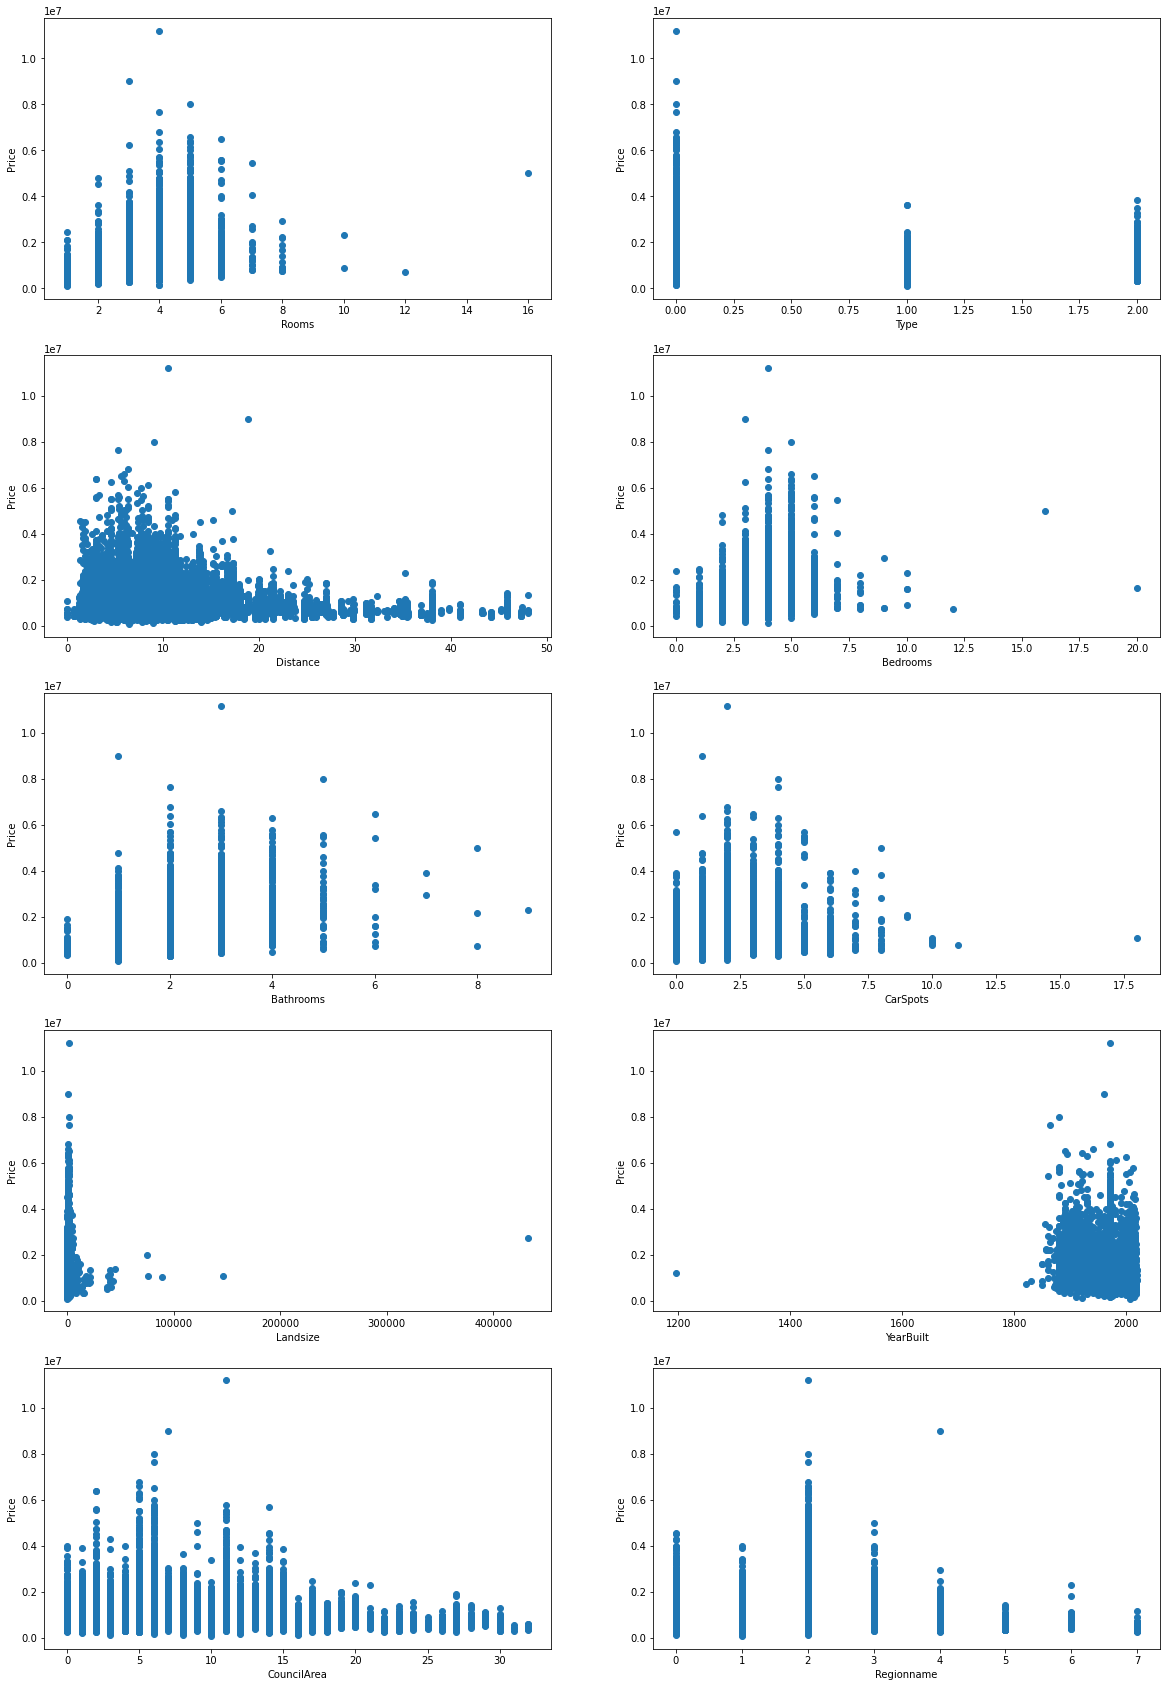

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,((ax00,ax01),(ax10,ax11),(ax20,ax21),(ax30,ax31),(ax40,ax41))=plt.subplots(nrows=5,ncols=2,figsize=(20,30))
ax00.scatter(df['Rooms'],df['Price']);
ax00.set(xlabel='Rooms',ylabel='Price')

ax01.scatter(df['Type'],df['Price'])
ax01.set(xlabel='Type',ylabel='Price')

ax10.scatter(df['Distance'],df['Price'])
ax10.set(xlabel='Distance',ylabel='Price')

ax11.scatter(df['Bedroom2'],df['Price'])
ax11.set(xlabel='Bedrooms',ylabel='Price')

ax20.scatter(df['Bathroom'],df['Price'])
ax20.set(xlabel='Bathrooms',ylabel='Price')

ax21.scatter(df['Car'],df['Price'])
ax21.set(xlabel='CarSpots',ylabel='Price')

ax30.scatter(df['Landsize'],df['Price'])
ax30.set(xlabel='Landsize',ylabel='Price')

ax31.scatter(df['YearBuilt'],df['Price'])
ax31.set(xlabel='YearBuilt',ylabel='Prcie')

ax40.scatter(df['CouncilArea'],df['Price'])
ax40.set(xlabel='CouncilArea',ylabel='Price')

ax41.scatter(df['Regionname'],df['Price'])
ax41.set(xlabel='Regionname',ylabel='Price');


In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        20800 non-null  int64  
 1   Rooms         20800 non-null  int64  
 2   Type          20800 non-null  int64  
 3   Price         20800 non-null  float64
 4   Distance      20800 non-null  float64
 5   Bedroom2      20800 non-null  float64
 6   Bathroom      20800 non-null  float64
 7   Car           20800 non-null  float64
 8   Landsize      20800 non-null  float64
 9   BuildingArea  20800 non-null  float64
 10  YearBuilt     20800 non-null  float64
 11  CouncilArea   20800 non-null  int64  
 12  Regionname    20800 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 2.8 MB


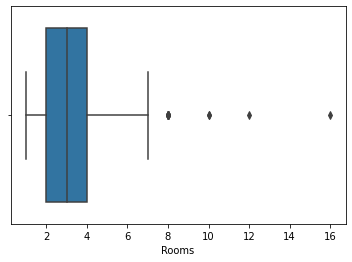

In [48]:
sns.boxplot(x=df["Rooms"]); 

In [49]:
#to identify outlier
def lower_upper(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    return (q1-1.5*iqr,q3+1.5*iqr)

In [50]:
l,u=lower_upper(df["Rooms"])
print(l,u)

-1.0 7.0


In [51]:
df=df[df['Rooms']<=u]

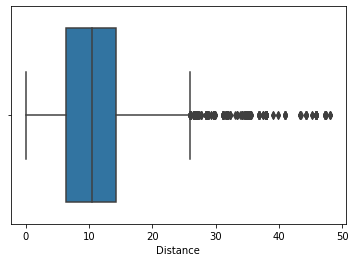

In [52]:
sns.boxplot(x=df['Distance']);

In [53]:
l,u=lower_upper(df['Distance'])
l,u

(-5.299999999999999, 25.9)

In [54]:
df=df[df['Distance']<=u]

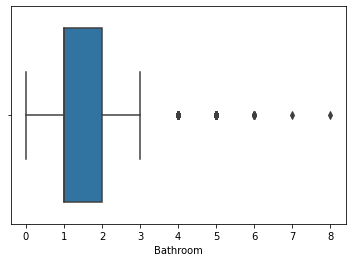

In [55]:
sns.boxplot(x=df['Bathroom']);

In [56]:
l,u=lower_upper(df['Bathroom'])
l,u
df=df[df['Bathroom']<=u]

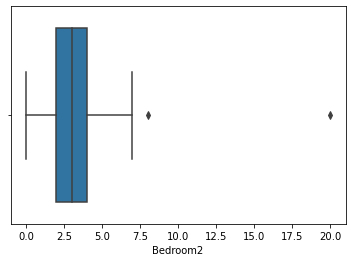

In [57]:
sns.boxplot(x=df['Bedroom2']);

In [58]:
l,u=lower_upper(df['Bedroom2'])
print(l,u)

-1.0 7.0


In [59]:
df=df[df['Bedroom2']<=u]

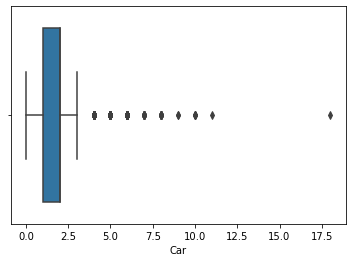

In [60]:
sns.boxplot(x=df['Car']);

In [61]:
df=df[df['Car']<=3]

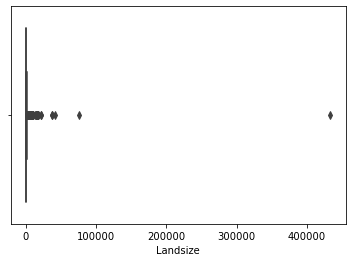

In [62]:
sns.boxplot(x=df['Landsize']);

In [63]:
l,u=lower_upper(df['Landsize'])
df=df[df['Landsize']<=u]
print(u)

1217.5


In [64]:
df.shape

(18288, 14)

# 5) Set X and y variables

In [65]:
X=df.drop(columns=['Price'],axis=1)

In [66]:
y=df['Price']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)

# 6) Set Algorithm

In [68]:
import numpy as np
np.random.seed(3)
model= LinearRegression() 

In [69]:
model.fit(X_train,y_train)

LinearRegression()

# 7) Find y - intercept and X coefficients

In [70]:
model.intercept_

-115351853.97348438

In [71]:
#x coefficients
model.coef_

array([   -792.48741485,  133053.44135559, -127068.23636334,
         60313.93918432,  -43884.09755921,   40688.96033746,
        207654.27589369,   36351.71744996,     379.80310033,
           544.05936081,   -2979.19445223,   -9559.79688325,
        132956.53180926])

In [72]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname'],
      dtype='object')

In [73]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Suburb,-792.487415
Rooms,133053.441356
Type,-127068.236363
Date,60313.939184
Distance,-43884.097559
Bedroom2,40688.960337
Bathroom,207654.275894
Car,36351.717450
Landsize,379.803100
BuildingArea,544.059361


# 8) Predict

In [89]:
new_house=[
    23,#suburb
    2,#Rooms
    1,#type
    2025,#SaleYear
    2.5,#Distance
    2,#Bedroom2
    1,#Bathroom
    1,#Car Spots
    202,#Landsize
    150,#building area
    2021,#year
    2,#CouncilArea
    2,#Regionname
]

In [90]:
new_house_prediction=model.predict([new_house])
new_house_prediction

array([1551317.69799174])

In [91]:
metrics.mean_absolute_error(y_train,model.predict(X_train))

278381.6847386679

In [92]:
prediction=model.predict(X_test)
metrics.mean_absolute_error(y_test,prediction)

274913.6790544245

In [93]:
model.score(X_train,y_train)*100

54.05072575084087

In [94]:
l_test=model.score(X_test,y_test)*100
print(l_test)

54.8117630874922


In [95]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [96]:
mean_absolute_percentage_error(y_test,model.predict(X_test))

28.879741983526465

# Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfr=RandomForestRegressor(random_state=110)

In [99]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=110)

In [100]:
rf_train=rfr.score(X_train,y_train)*100
print(rf_train)

96.80821159618365


In [101]:
mean_absolute_percentage_error(y_test,rfr.predict(X_test))

15.384509970796644

In [102]:
rf_test=rfr.score(X_test,y_test)*100
print(rf_test)

78.82735653667692


# Gradient Boosting Regressor

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gbr = GradientBoostingRegressor()

In [105]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [106]:
gbr_predict=gbr.predict(X_test)

In [107]:
metrics.mean_absolute_error(y_test,gbr.predict(X_test))

184253.43881040768

In [108]:
mean_absolute_percentage_error(y_test,gbr.predict(X_test))

17.771375964604953

In [109]:
gbr.score(X_train,y_train)*100

77.77375856252725

In [110]:
gbr.score(X_test,y_test)*100

76.7568372886679

In [111]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname'],
      dtype='object')

# Experimentation

In [112]:
gbr = GradientBoostingRegressor(n_estimators=150,
                                learning_rate =0.1, 
                                max_depth=5,
                                min_samples_split=4,
                                min_samples_leaf=6,
                                loss='huber',
                                max_features=0.6,
                               random_state=150)

In [113]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=150, random_state=150)

In [114]:
new_house=[
    25,#suburb
    2,#Rooms
    1,#type
    2025,#saledate
    2.5,#Distance
    2,#Bedroom2
    1,#Bathroom
    1,#Car Spots
    202,#Landsize
    100,#Building Area
    2020,#year
    2,#CouncilArea
    2,#Regionname
     
]

In [115]:
gbr.predict([new_house])

array([872360.73604425])

In [116]:
gbr.score(X_train,y_train)*100

83.20680436811529

In [117]:
gbr.score(X_test,y_test)*100

80.40683974362862

In [118]:
metrics.mean_absolute_error(y_train,gbr.predict(X_train))

140341.80869314665

In [119]:
metrics.mean_absolute_error(y_test,gbr.predict(X_test))

159000.52011215236

In [120]:
mean_absolute_percentage_error(y_test,gbr.predict(X_test))

14.567840970509558

# Hyperparameter Tuning

In [804]:
from sklearn.model_selection import GridSearchCV

In [805]:
ggbr=GradientBoostingRegressor()

In [806]:
hyperparameters={
    'n_estimators':[150,250,300],
    'learning_rate':[0.1,0.2,0.3],
    'max_depth':[4,5,6],
    'min_samples_split':[3,4],
    'min_samples_leaf':[5,6], 
    'max_features':[0.6,0.8,0.9],
    'loss':['ls','lad','huber']
}

In [826]:
grid=GridSearchCV(ggbr,hyperparameters,n_jobs=4)

In [827]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad', 'huber'], 'max_depth': [4, 5, 6],
                         'max_features': [0.6, 0.8, 0.9],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [3, 4],
                         'n_estimators': [150, 250, 300]})

In [828]:
grid.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 6,
 'max_features': 0.8,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 300}

In [132]:
grid=GradientBoostingRegressor(learning_rate=0.1,
                              loss='huber',
                              max_depth=6,
                              max_features='auto',
                              min_samples_leaf=5,
                              min_samples_split=3,
                              n_estimators=250)


In [134]:
grid.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features='auto',
                          min_samples_leaf=5, min_samples_split=3,
                          n_estimators=250)

In [135]:
grid.score(X_train,y_train)

0.8798644574855932

In [136]:
grid.score(X_test,y_test)

0.8153015383520801

In [137]:
egbr=GradientBoostingRegressor(learning_rate=0.1,
                             loss='huber',
                             max_depth=5,
                             min_samples_leaf=6,
                             min_samples_split=4,
                             max_features=0.6,
                             n_estimators=300,
                             random_state=100)

In [138]:
egbr.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=300, random_state=100)

In [139]:
egbr.score(X_train,y_train)

0.8594706730315386

In [140]:
egbr.score(X_test,y_test)

0.8180864575490322

In [825]:
#testing
for i in [200,250,300]:
    for j in [5,4,6]:
        for k in [3,4,10]:
            for l in [5,6]:
                for m in [0.1,0.15,0.2,0.3,0.5]:
                    for n in [0.6,0.8,0.9]:
                        exp=GradientBoostingRegressor(n_estimators=i,max_depth=j,min_samples_split=k,
                                                     min_samples_leaf=l,learning_rate=m,max_features=n,loss='huber')
                        exp.fit(X_train,y_train)
                        train_score=exp.score(X_train,y_train)
                        test_score=exp.score(X_test,y_test)
                        print(f'n_estimators:{i} max_depth:{j} min_split:{k} min_leaf:{l} learning_rate:{m} max_fe:{n} train:{train_score} test:{test_score}')

n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.1 max_fe:0.6 train:0.8430194685507747 test:0.8091955212919276
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.1 max_fe:0.8 train:0.8447278303484951 test:0.810140797848196
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.1 max_fe:0.9 train:0.8450269892909777 test:0.8082079440286358
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.6 train:0.8554285554985057 test:0.8136591260243985
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.8 train:0.8598724901391963 test:0.8124979342990168
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.9 train:0.8595418476671495 test:0.8111499574529649
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.2 max_fe:0.6 train:0.865963373141004 test:0.809939048578102
n_estimators:200 max_depth:5 min_split:3 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.8

n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.15 max_fe:0.8 train:0.8612926945218485 test:0.8128784136108663
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.15 max_fe:0.9 train:0.858829486926006 test:0.8120458024473354
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.6 train:0.8678330590893051 test:0.8112061331084985
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.8711716917339407 test:0.8149132519575067
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.9 train:0.8688807407574136 test:0.8134304891982975
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.6 train:0.8830052296113872 test:0.807283128911993
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.8 train:0.8856266182727652 test:0.8056859272647897
n_estimators:200 max_depth:5 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.9 t

n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.8397854080814456 test:0.8091238337728546
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.2 max_fe:0.9 train:0.8421046657100826 test:0.808307012166937
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.6 train:0.8570980250818487 test:0.8047564775957425
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.8 train:0.8553388190369544 test:0.8048164375706772
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.9 train:0.8591106722646896 test:0.8094778270959422
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.6 train:0.872287245227467 test:0.799155647971597
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.8 train:0.8720000491858834 test:0.797685975580328
n_estimators:200 max_depth:4 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.9 train:0.87497

n_estimators:200 max_depth:6 min_split:3 min_leaf:5 learning_rate:0.3 max_fe:0.8 train:0.9072059633907521 test:0.8066392597556589
n_estimators:200 max_depth:6 min_split:3 min_leaf:5 learning_rate:0.3 max_fe:0.9 train:0.9043305023893341 test:0.8098621168938757
n_estimators:200 max_depth:6 min_split:3 min_leaf:5 learning_rate:0.5 max_fe:0.6 train:0.9193809518803177 test:0.7929658618524398
n_estimators:200 max_depth:6 min_split:3 min_leaf:5 learning_rate:0.5 max_fe:0.8 train:0.9209375697729578 test:0.7975734027931788
n_estimators:200 max_depth:6 min_split:3 min_leaf:5 learning_rate:0.5 max_fe:0.9 train:0.918767146261582 test:0.7933291398186252
n_estimators:200 max_depth:6 min_split:3 min_leaf:6 learning_rate:0.1 max_fe:0.6 train:0.8656009417345915 test:0.8167719381784976
n_estimators:200 max_depth:6 min_split:3 min_leaf:6 learning_rate:0.1 max_fe:0.8 train:0.8658782896420985 test:0.8173473124503305
n_estimators:200 max_depth:6 min_split:3 min_leaf:6 learning_rate:0.1 max_fe:0.9 train:0.86

n_estimators:200 max_depth:6 min_split:10 min_leaf:5 learning_rate:0.5 max_fe:0.8 train:0.9202091167939778 test:0.7961110054460587
n_estimators:200 max_depth:6 min_split:10 min_leaf:5 learning_rate:0.5 max_fe:0.9 train:0.920041291251938 test:0.7969984204853506
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.1 max_fe:0.6 train:0.8656156606799401 test:0.816490690371805
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.1 max_fe:0.8 train:0.8659173768957458 test:0.8115553173142385
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.1 max_fe:0.9 train:0.8657680884777244 test:0.8170482657224003
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.15 max_fe:0.6 train:0.8783515758996197 test:0.8130087467520172
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.15 max_fe:0.8 train:0.8794683388391504 test:0.8148803443796049
n_estimators:200 max_depth:6 min_split:10 min_leaf:6 learning_rate:0.15 max_fe:0.9 

n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.1 max_fe:0.8 train:0.8514394054638075 test:0.8130358035435037
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.1 max_fe:0.9 train:0.8533020845882089 test:0.8132717454287445
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.15 max_fe:0.6 train:0.8653668801574266 test:0.8172864809979005
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.15 max_fe:0.8 train:0.864642817095745 test:0.8134934650955592
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.15 max_fe:0.9 train:0.8659920374852788 test:0.8149344036954058
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.2 max_fe:0.6 train:0.8749763963855526 test:0.8138535938498157
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.2 max_fe:0.8 train:0.875384918154134 test:0.8130223912973089
n_estimators:250 max_depth:5 min_split:4 min_leaf:6 learning_rate:0.2 max_fe:0.9 train:0.

n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.15 max_fe:0.8 train:0.8369296894866991 test:0.8078916549992765
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.15 max_fe:0.9 train:0.8401506725871786 test:0.809787741347979
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.2 max_fe:0.6 train:0.8477488861109814 test:0.8082969299672997
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.2 max_fe:0.8 train:0.8460166918706943 test:0.8090714665187
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.2 max_fe:0.9 train:0.8498456469738949 test:0.8119006255056864
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.3 max_fe:0.6 train:0.8618772806990286 test:0.8065940822279447
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.3 max_fe:0.8 train:0.8637443865800831 test:0.811448782570705
n_estimators:250 max_depth:4 min_split:3 min_leaf:6 learning_rate:0.3 max_fe:0.9 train:0.8636

n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.2 max_fe:0.8 train:0.8509273222187854 test:0.8091126939880304
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.2 max_fe:0.9 train:0.8492447132026728 test:0.8103461570704823
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.3 max_fe:0.6 train:0.8607987452586112 test:0.8054676710910752
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.3 max_fe:0.8 train:0.8643293953258175 test:0.8093584184312852
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.3 max_fe:0.9 train:0.8631714670828673 test:0.807290178602605
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.5 max_fe:0.6 train:0.8766610125115277 test:0.8015885998799921
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.5 max_fe:0.8 train:0.8793306865764894 test:0.8019877512036786
n_estimators:250 max_depth:4 min_split:10 min_leaf:6 learning_rate:0.5 max_fe:0.9 tr

n_estimators:250 max_depth:6 min_split:4 min_leaf:6 learning_rate:0.3 max_fe:0.8 train:0.9112014007495246 test:0.8119593112635191
n_estimators:250 max_depth:6 min_split:4 min_leaf:6 learning_rate:0.3 max_fe:0.9 train:0.9094473240009988 test:0.8070686758991981
n_estimators:250 max_depth:6 min_split:4 min_leaf:6 learning_rate:0.5 max_fe:0.6 train:0.9241972301922191 test:0.7860315306134869
n_estimators:250 max_depth:6 min_split:4 min_leaf:6 learning_rate:0.5 max_fe:0.8 train:0.9248257184498163 test:0.7858859076515945
n_estimators:250 max_depth:6 min_split:4 min_leaf:6 learning_rate:0.5 max_fe:0.9 train:0.9238304645061656 test:0.7879940658078239
n_estimators:250 max_depth:6 min_split:10 min_leaf:5 learning_rate:0.1 max_fe:0.6 train:0.8755911964269639 test:0.8165496046136611
n_estimators:250 max_depth:6 min_split:10 min_leaf:5 learning_rate:0.1 max_fe:0.8 train:0.8739456165566112 test:0.815753581472539
n_estimators:250 max_depth:6 min_split:10 min_leaf:5 learning_rate:0.1 max_fe:0.9 train:0

n_estimators:300 max_depth:5 min_split:3 min_leaf:6 learning_rate:0.5 max_fe:0.8 train:0.9115522993819952 test:0.7949475534201326
n_estimators:300 max_depth:5 min_split:3 min_leaf:6 learning_rate:0.5 max_fe:0.9 train:0.9112422955412633 test:0.7961765659462978
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.1 max_fe:0.6 train:0.8575975998015342 test:0.8145913960009239
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.1 max_fe:0.8 train:0.8603196499571686 test:0.8142526116625477
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.1 max_fe:0.9 train:0.8591994447024852 test:0.8139062677399882
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.15 max_fe:0.6 train:0.8740561056545729 test:0.8136482522044682
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.15 max_fe:0.8 train:0.8759928825247898 test:0.8149263317909714
n_estimators:300 max_depth:5 min_split:4 min_leaf:5 learning_rate:0.15 max_fe:0.9 train:

n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.1 max_fe:0.8 train:0.8323597997196484 test:0.807804821895647
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.1 max_fe:0.9 train:0.8315417772646307 test:0.8045178025374355
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.6 train:0.8440254649325457 test:0.8095653383363123
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.8 train:0.8466748504649213 test:0.8090565214635501
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.15 max_fe:0.9 train:0.8455720616945529 test:0.8079322069287117
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.2 max_fe:0.6 train:0.857005832955619 test:0.8131759974425509
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.8584909031680086 test:0.8133714520141407
n_estimators:300 max_depth:4 min_split:3 min_leaf:5 learning_rate:0.2 max_fe:0.9 train:0.

n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.15 max_fe:0.8 train:0.8444983052578601 test:0.8083569485532048
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.15 max_fe:0.9 train:0.8482568912467497 test:0.8104740588392141
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.6 train:0.8578356445398221 test:0.8104884147962409
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.855201252254498 test:0.8111639427317698
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.2 max_fe:0.9 train:0.8580370355023433 test:0.8124621750405971
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.6 train:0.8682120075337927 test:0.8124141999523844
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.8 train:0.8707146582927021 test:0.8064869450843277
n_estimators:300 max_depth:4 min_split:10 min_leaf:5 learning_rate:0.3 max_fe:0.9 

n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.2 max_fe:0.8 train:0.904700460608187 test:0.8167493831167575
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.2 max_fe:0.9 train:0.9059669087296537 test:0.812122220295623
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.6 train:0.9176714521843721 test:0.8007161930614283
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.8 train:0.917196950209076 test:0.8087343694227768
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.3 max_fe:0.9 train:0.9189303831142233 test:0.8054834646763808
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.6 train:0.9308000175313812 test:0.7885239589418669
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.8 train:0.9328935247659215 test:0.785070504904266
n_estimators:300 max_depth:6 min_split:4 min_leaf:5 learning_rate:0.5 max_fe:0.9 train:0.93411

In [141]:
final_model=GradientBoostingRegressor(n_estimators=250,max_depth=5,min_samples_split=3,min_samples_leaf=6,learning_rate=0.1,
                                     max_features=0.6,loss='huber',random_state=350)
final_model.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=3,
                          n_estimators=250, random_state=350)

In [142]:
f_train=final_model.score(X_train,y_train)*100
print(f_train)

85.07113008764047


In [143]:
f_test=final_model.score(X_test,y_test)*100
print(f_test)

81.30581388665988


In [144]:
import joblib 
joblib.dump(final_model,"model1.pkl")

['model1.pkl']

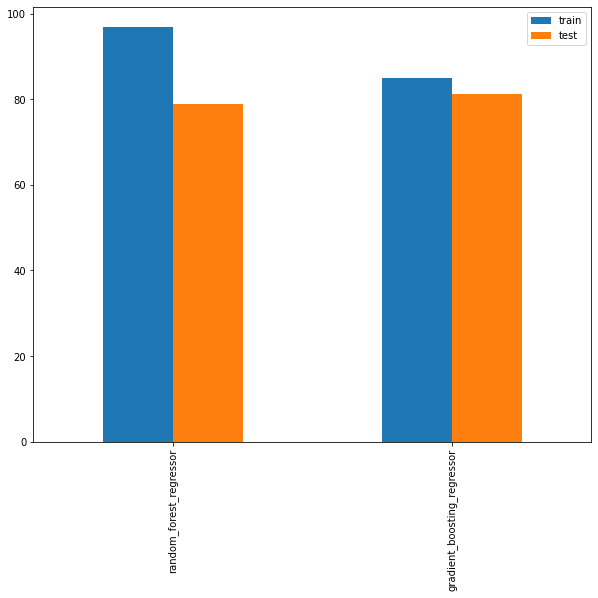

In [156]:
compare_models=pd.DataFrame(
            {
             "train":{'random_forest_regressor':rf_train,'gradient_boosting_regressor':f_train},
             "test":{'random_forest_regressor':rf_test,'gradient_boosting_regressor':f_test}})



compare_models.plot.bar(figsize=(10,8));